In [6]:
import matplotlib.pyplot as plt
from math import exp

In [7]:
def met_euler(a, b, y, h):
    valores = [y]
    x = a + h
    while x <= b:
        y_ = y + h * df(x, y)
        valores.append(y_)
        x += h
        y = y_
    return valores

In [8]:
def met_euler_melhorado(a, b, y, h):
    valores = [y]
    x = a + h
    while x <= b:
        yh = y + df(x, y) * h
        y_ = y + (h / 2) * (df(x, y) + df(x + h, yh))
        valores.append(y_)
        y = y_
        x += h
    return valores

In [9]:
def met_rk4(a, b, y, h):
    valores = [y]
    x = a + h
    while x <= b:
        k1 = h * df(x, y)
        k2 = h * df(x + h / 2, y + k1 / 2)
        k3 = h * df(x + h / 2, y + k2 / 2)
        k4 = h * df(x + h, y + k3)
        y_ = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        valores.append(y_)
        y = y_
        x += h
    return valores

In [10]:
def get_grid(start, end, jump):
    values = []
    h = start
    while h <= end:
        values.append(h)
        h += jump
    return values

In [11]:
"""
Recebe uma lista de tuplas, onde as tuplas contém uma função, h (step) e seu nome
"""
def plotar(metodos, funcao=None):
    # Realizando plot
    # Convertendo respostas para numpy
    x_num, y_num = 1, 1

    # Gerando a malha (grid)
    x_min, x_max = a, b
    grid_metodos = []
    grid_legends = []
    for metodo, h, legend in metodos:
        grid = get_grid(x_min, x_max, h)
        grid_metodos.append((grid, metodo(x_min, x_max, y, h)))
        grid_legends.append(legend)
    if funcao is not None:
        funcao, h = funcao
        grid = get_grid(x_min, x_max, h)
        f_grid = []
        for x in grid:
            f_grid.append(funcao(x))
        
    # Instruções do plot
    fig, ax = plt.subplots(figsize = (8,8))
    for grid, metodo in grid_metodos:
        ax.plot(grid, metodo, linewidth = 3)
    if funcao is not None:
        ax.plot(grid, f_grid, linewidth = 3)
    ax.plot(x_num, y_num, linestyle = "None") # pontos do conjunto de dados

    # Labels nos eixos, limites do plot e legenda
    ax.set_xlabel("$x$", size = 16)
    ax.set_ylabel("$y$", size = 18)
    ax.set_xlim(x_min, x_max)
    ax.tick_params(axis='both', which='major', labelsize=14)
    if funcao is None:
        ax.legend(grid_legends, loc = "upper right", fontsize=10)
    else:
        ax.legend(grid_legends + ["$f(x)$"], loc = "upper right", fontsize=10)
    ax.grid(True)

    plt.show()

In [12]:
"""
Recebe uma lista de tuplas, onde as tuplas contém uma função, h (step) e seu nome
"""
def plotar_erro_relativo(metodos, funcao):
    # Realizando plot
    # Convertendo respostas para numpy
    x_num, y_num = 1, 1

    # Gerando a malha (grid)
    x_min, x_max = a, b
    
    funcao, h = funcao
    grid = get_grid(x_min, x_max, h)
    f_grid = []
    for x in grid:
        f_grid.append(funcao(x))
    
    grid_metodos = []
    grid_legends = []
    for metodo, h, legend in metodos:
        grid = get_grid(x_min, x_max, h)
        grid_m = metodo(x_min, x_max, y, h)
        grid_erro = []
        for i, met in enumerate(grid_m):
            grid_erro.append(abs(met - f_grid[i]) / f_grid[i])
        grid_metodos.append((grid, grid_erro))
        grid_legends.append(legend)
        
    # Instruções do plot
    fig, ax = plt.subplots(figsize = (8,8))
    for grid, metodo in grid_metodos:
        ax.plot(grid, metodo, linewidth = 3)
    ax.plot(x_num, y_num, linestyle = "None") # pontos do conjunto de dados

    # Labels nos eixos, limites do plot e legenda
    ax.set_xlabel("$x$", size = 16)
    ax.set_ylabel("$y$", size = 18)
    ax.set_xlim(x_min, x_max)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(grid_legends, loc = "upper right", fontsize=10)
    ax.grid(True)

    plt.show()

## Questão 1
A Lei de Aquecimento e Resfriamento de Newton afirma que a taxa de variação da temperatura T em relação ao tempo t de um objeto é proporcional a diferença entre as temperaturas do objeto e de seu entorno, ou seja,
> $\dfrac{dT(t)}{dt} = k(T (t) − Ta)$

onde $Ta$ é a tempertura do ambiente e $k$ a constante de proporcionalidade.

a) Resolva numericamente, com diversos valores de $h$, esta equação para $T$ em função do tempo $t$ utilizando os métodos de Euler, RK2 e RK4 para determinar a tempeatura após $15min$ de uma porção de água, inicialmente a $6ºC$, colocada em um ambiente com temperatura $Ta = 25ºC$, sabendo que a constante de proporcionalidade para a água é $k = -1, 335$.

In [13]:
Ta = 25
k = -1.335
a = 0
b = 15
y = 6
h = 1

In [17]:
def df(t, T):
    return k * (T - Ta)

In [15]:
metodos = [(met_euler, h, "Euler"),
           (met_euler_melhorado, h, "Euler Melhorado"),
           (met_rk4, h, "RK4")]

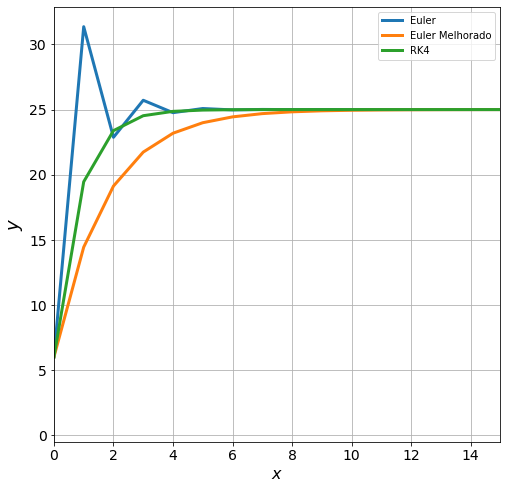

In [16]:
plotar(metodos)

b) Com seus resultados numéricos, estime quanto tempo levará para a água atingir a temperatura ambiente.

R: Aproximadamente 4 minutos.

c) Sabendo que a solução analítica para o problema é $T(t) = Ta +
(To − Ta)e^{−kt}$, sendo $To = T(0)$, exiba um único gráfico contendo
os valores numéricos obtidos pelos 3 métodos em (a) e o gráfico da
solução analítica ao longo dos $15min$.

In [18]:
def f(t):
    return Ta + (y - Ta) * exp(𝑘 * t)

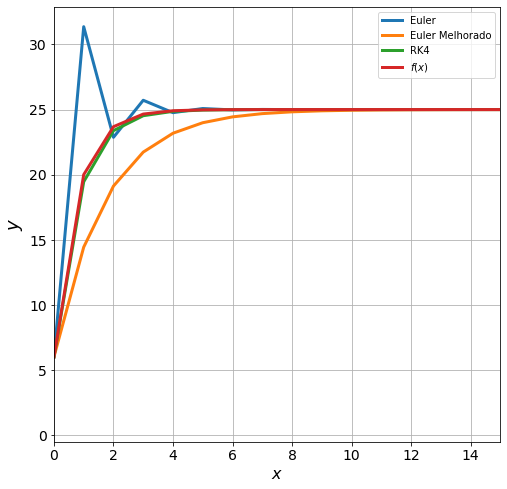

In [19]:
plotar(metodos, (f, h))

d) Exiba em um único gráfico os erros relativos das soluções numéricas
obtidas em (a).

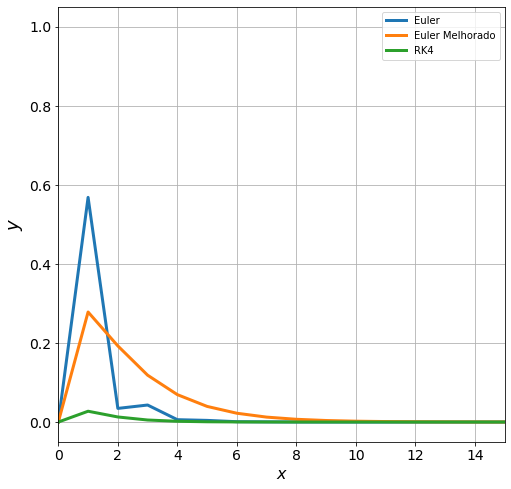

In [20]:
plotar_erro_relativo(metodos, (f, h))

3\. Considere duas espécies, uma espécie presa e a outra predadora. O modelo apresentado abaixo para a relação entre presa e predador não descreve, no caso geral, as complexas relações observadas na Natureza, no entanto o estudo de modelos simples (de duas espécies interagindo)  ́e um passo importante para a compreensão de fenômenos mais complexos. A modelagem matemática de sistemas com mais de duas espécies interagentes ́e simples, contudo a interpretação da dinâmica das populações torna-se complexa. Portanto, almejando um texto didático, restringe-se este exemplo à dinâmica de duas populações.

Sejam as populações da presa e do predador, respectivamente, denotadas por $x(t)$ e $y(t)$, no instante $t$. Ao modelar matematicamente a interação das espécies, considera-se que na ausência do predador, $y(t) = 0$, a população de presas aumentará, sem nenhum tipo de obstáculo, a uma taxa proporcional à população atual, ou seja, com um termo da forma $ax(t)$, onde $a$ é uma constante positiva. Por outro lado, considera-se que a carência de presas, $x(t) = 0$, acarretará a extinção da população de predadores devido à falta de alimento, situação descrita por um termo da forma $−cy(t)$, onde $c$ é uma constante positiva. Considera-se também que o número de encontros entre as duas espécies é proporcional ao produto das populações de cada espécie, ou seja, $x(t)y(t)$. Estes encontros tendem a promover o crescimento da população de predadores e a inibir o crescimento da população de presas. Assim, a taxa de crescimento da população de predadores, $\dfrac{dy}{dt}$, é aumentada por um termo da forma = $γx(t)y(t)$, enquanto a taxa de crescimento da população de presas, $\dfrac{dx}{dt}$, é diminuída por um termo da forma $−αx(t)y(t)$, onde $α$ e $γ$ são constantes positivas. Em consequência dessa modelagem matemática, somos levados às equações de Lotka-Volterra dadas por

$\dfrac{dx}{dt} = ax − αxy$

$\dfrac{dy}{dt} = −cy + γxy$

com $x(0) = xo$ e $y(0) = yo$, $a$ é a taxa de crescimento efetiva da população das presas na ausência de predadores, $c$ é a taxa de mortalidade da população de predadores na ausência de presas, $α$  ́e a taxa de decréscimo da população de presas devido aos encontros com predadores e $γ$  ́e a taxa de crescimento da população dos predadores devido à predação

a) Implemente o Método de Euler para sistemas e resolva o sistema de Lotka-Volterra considerando $a = 1.0$, $c = 0.75$, $α = γ = 0.5$. Rode sempre 100/h iterações, dessa forma suas simulações terão sempre 100 unidades de tempo (dias, semanas, meses, anos... isso não importa).

In [145]:
a = 1.0
c = 0.75
α, γ = 0.5, 0.5

In [146]:
def dev_x(x, y):
    return a * x - α * x * y

In [147]:
def dev_y(x, y):
    return -c * y + γ * x * y

In [144]:
def met_euler_2(x, y, h, limite):
    valores_x, valores_y = [], []
    t = 0
    while t <= limite:
        y_ = y + h * dev_y(x, y)
        x_ = x + h * dev_x(x, y)
        if x_ < 0:
            x_ = 0
        if y_ < 0:
            y_ = 0
        valores_x.append(x_)
        valores_y.append(y_)
        x = x_
        y = y_
        t += h
    return valores_x, valores_y

In [181]:
def plotar_presa_predador(x, y, h, inicio=0, limite=100):
    # Realizando plot
    # Convertendo respostas para numpy
    x_num, y_num = 1, 1
    #beta_num = np.array(solution).astype(float).flatten()

    # Gerando a malha (grid)
    x_min, x_max = inicio, limite
    # Calculando o valor da função (no caso, a reta) nesta malha (grid) gerada
    t_grid = get_grid(x_min, x_max, h)
    x_grid, y_grid = met_euler_2(x, y, h, limite)
    """for i in range(len(t_grid)):
        print(t_grid[i], x_grid[i], y_grid[i])"""
    # Instruções do plot
    fig, ax = plt.subplots(figsize = (16,8))
    ax.plot(t_grid, x_grid, linewidth=3) # reta
    ax.plot(t_grid, y_grid, linewidth=3) # reta
    ax.plot(x_num, y_num, linestyle = "None") # pontos do conjunto de dados

    # Labels nos eixos, limites do plot e legenda
    ax.set_xlabel("$t$", size = 16)
    ax.set_ylabel("$p$", size = 18)
    ax.set_xlim(x_min, x_max)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(["$x(t)$", "$y(t)$"], loc = "upper left", fontsize = 15)
    ax.grid(True)

    plt.show()

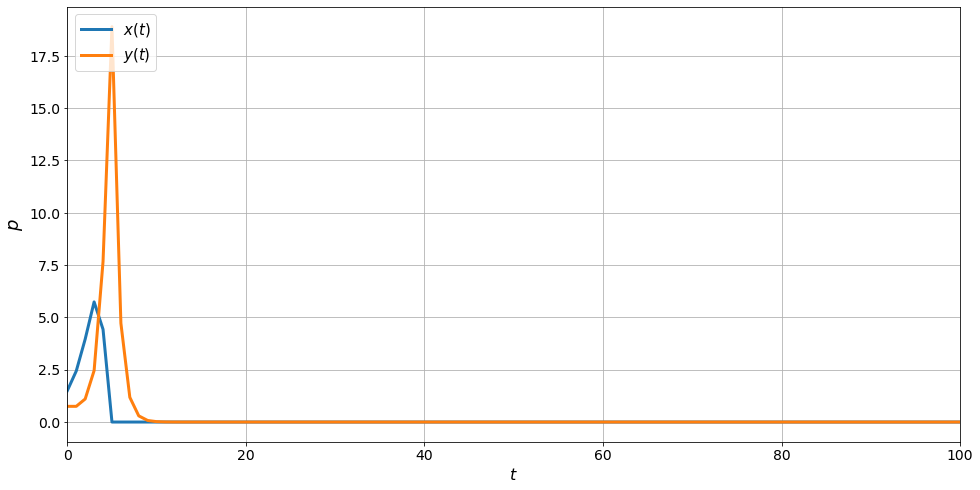

In [182]:
plotar_presa_predador(1, 1, 1)

b) Considere o ponto inicial (2, 5) e, a partir de $h = 0,1$, responda: qual
o efeito da diminuição do valor de $h$ no resultado?

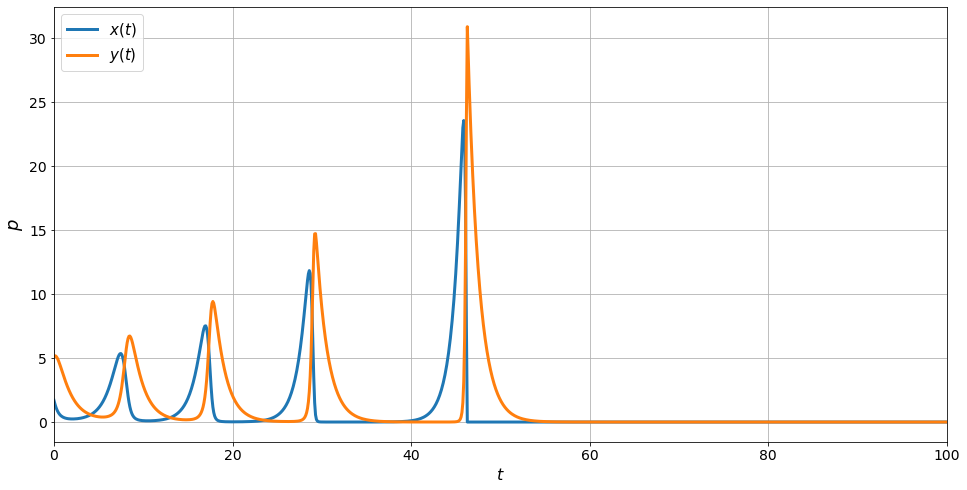

In [183]:
plotar_presa_predador(2, 5, 0.1)

R: É possível ver que, com $h = 0,1$, as funções passaram a perdurar mais antes de zerarem. possívelmente significando uma aproximação melhor da realidade.

c) Com um valor de $h$ apropriado, rode seu programa considerando
diferentes pontos iniciais e interprete os resultados.

In [160]:
h = 0.001

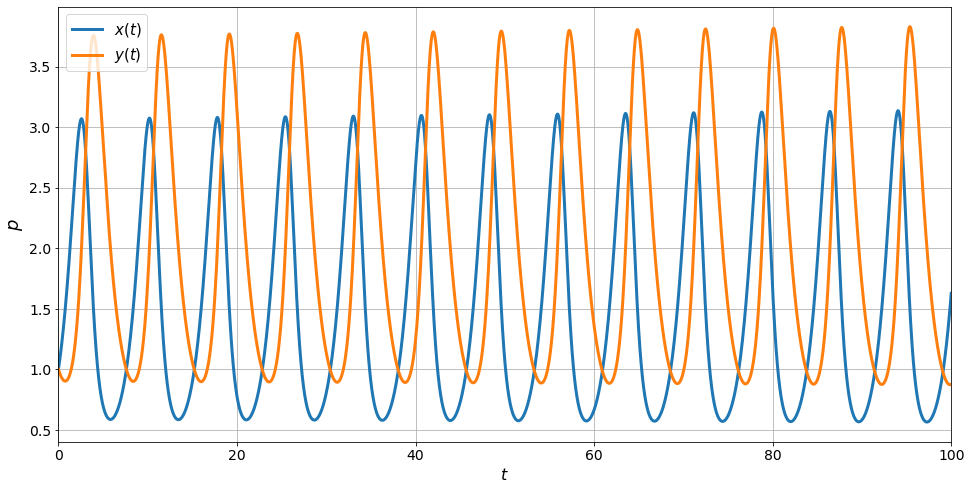

In [184]:
plotar_presa_predador(1, 1, h)

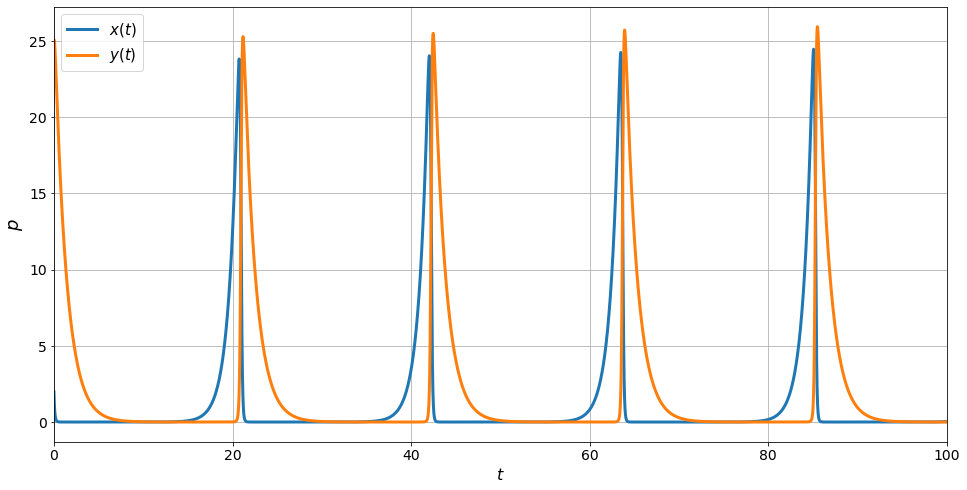

In [185]:
plotar_presa_predador(2, 25, h)

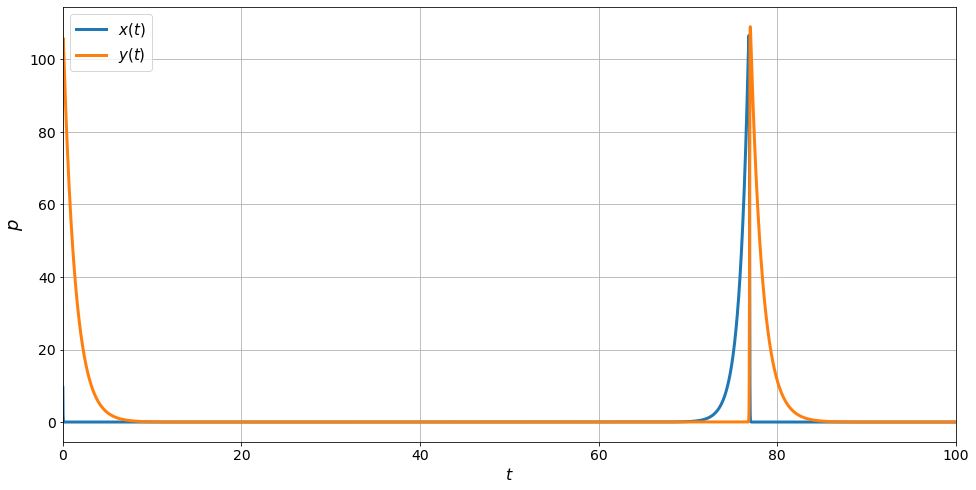

In [188]:
plotar_presa_predador(10, 100, h)

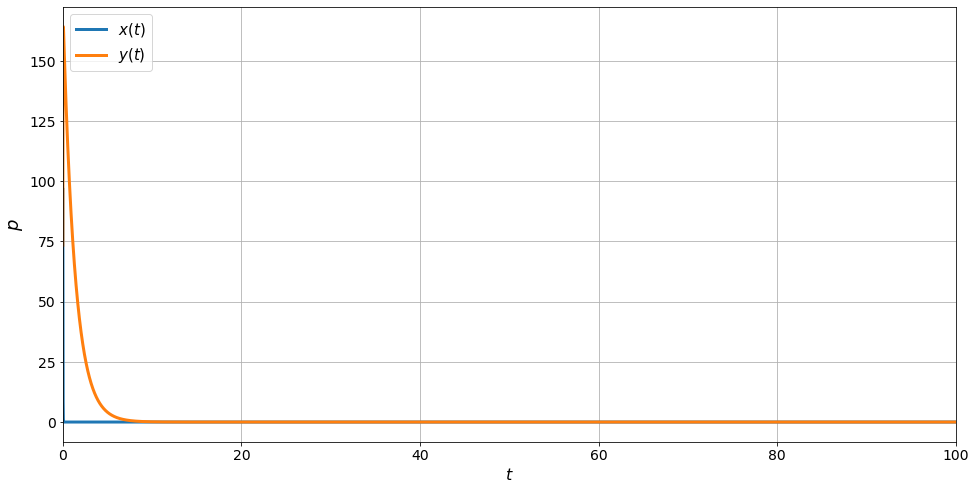

In [178]:
plotar_presa_predador(100, 70, h)

R: Com valores $x$ e $y$ iniciais relativamente baixos, as funções tendem a ter um comportamento 'normal', porém conforme aumentamos os valores iniciais, a distância entre os ciclos de aumento das espécies tendem a aumentar até chegar a um ponto em que apenas 1 ou 2 ciclos podem ser vistos.